### Electrical Response Estimation of Vibratory Energy Harvesters via Hilbert Transform Based Stochastic Averaging

#### Author: Ketson R. M. dos Santos

##### Figures: 2-5

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import offsetbox

from matplotlib.legend_handler import HandlerLine2D
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
from scipy.io import loadmat

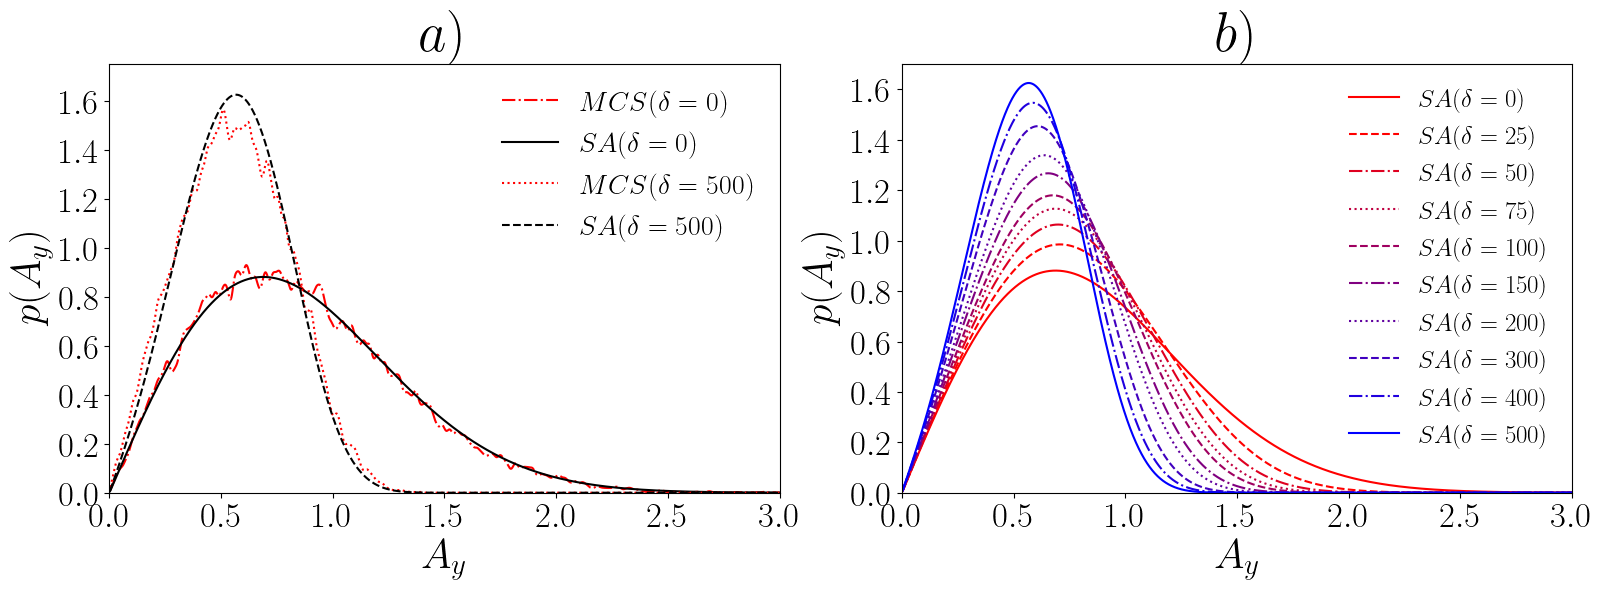

In [2]:
D1 = loadmat('mcs_stat_lin_proc.mat')
A = D1["A"][0]
p = D1["p"][0]
pAy = D1["pAy"][0]

D01 = loadmat('mcs_stat_duff_proc_d50.mat')
A01 = D01["A"][0]
p01 = D01["p"][0]
pAy01 = D01["pAy"][0]

D02 = loadmat('mcs_stat_duff_proc_d100.mat')
A02 = D02["A"][0]
p02 = D02["p"][0]
pAy02 = D02["pAy"][0]

D03 = loadmat('mcs_stat_duff_proc_d150.mat')
A03 = D03["A"][0]
p03 = D03["p"][0]
pAy03 = D03["pAy"][0]

D04 = loadmat('mcs_stat_duff_proc_d200.mat')
A04 = D04["A"][0]
p04 = D04["p"][0]
pAy04 = D04["pAy"][0]

D05 = loadmat('mcs_stat_duff_proc_d300.mat')
A05 = D05["A"][0]
p05 = D05["p"][0]
pAy05 = D05["pAy"][0]

D06 = loadmat('mcs_stat_duff_proc_d400.mat')
A06 = D06["A"][0]
p06 = D06["p"][0]
pAy06 = D06["pAy"][0]

D07 = loadmat('mcs_stat_duff_proc_d500.mat')
A07 = D07["A"][0]
p07 = D07["p"][0]
pAy07 = D07["pAy"][0]

D08 = loadmat('mcs_stat_duff_proc_d25.mat')
A08 = D08["A"][0]
p08 = D08["p"][0]
pAy08 = D08["pAy"][0]

D09 = loadmat('mcs_stat_duff_proc_d75.mat')
A09 = D09["A"][0]
p09 = D09["p"][0]
pAy09 = D09["pAy"][0]


fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)

ax.plot(A,p,'r-.',label=r'$MCS (\delta=0)$')
ax.plot(A,pAy,'k-',label=r'$SA (\delta=0)$')
ax.plot(A07,p07,'r:',label=r'$MCS (\delta=500)$')
ax.plot(A07,pAy07,'k--',label=r'$SA (\delta=500)$')
ax.legend(prop={'size':20}, framealpha=0.0)
ax.set_xlim(0,3)
ax.set_ylim(0,1.75)
ax.set_yticks(np.arange(0, 1.7, 0.2))
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xlabel('$A_y$', fontsize=30)
ax.set_ylabel('$p(A_y)$', fontsize=30)
ax.set_title(r'$a)$',fontsize=40)

ax = fig.add_subplot(1, 2, 2)
ax.plot(A,pAy,'r-',label=r'$SA (\delta=0)$')
ax.plot(A08,pAy08,'--',color=[1,0,0],label=r'$SA (\delta=25)$')
ax.plot(A01,pAy01,'-.',color=[0.875,0,0.125],label=r'$SA (\delta=50)$')
ax.plot(A09,pAy09,':',color=[0.75,0,0.25],label=r'$SA (\delta=75)$')
ax.plot(A02,pAy02,'--',color=[0.625,0,0.375],label=r'$SA (\delta=100)$')
ax.plot(A03,pAy03,'-.',color=[0.5,0,0.5],label=r'$SA (\delta=150)$')
ax.plot(A04,pAy04,':',color=[0.375,0,0.625],label=r'$SA (\delta=200)$')
ax.plot(A05,pAy05,'--',color=[0.25,0,0.75],label=r'$SA (\delta=300)$')
ax.plot(A06,pAy06,'-.',color=[0.125,0,0.875],label=r'$SA (\delta=400)$')
ax.plot(A07,pAy07,'b-',label=r'$SA (\delta=500)$')
ax.legend(prop={'size':18}, framealpha=0.0)
ax.set_xlim(0,3)
ax.set_ylim(0,1.7)

ax.set_yticks(np.arange(0, 1.7, 0.2))
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title(r'$b)$',fontsize=40)
ax.set_xlabel('$A_y$', fontsize=30)
ax.set_ylabel('$p(A_y)$', fontsize=30)


fig.tight_layout()
plt.draw()
plt.savefig('figure_2.eps',dpi=1000)
plt.show()

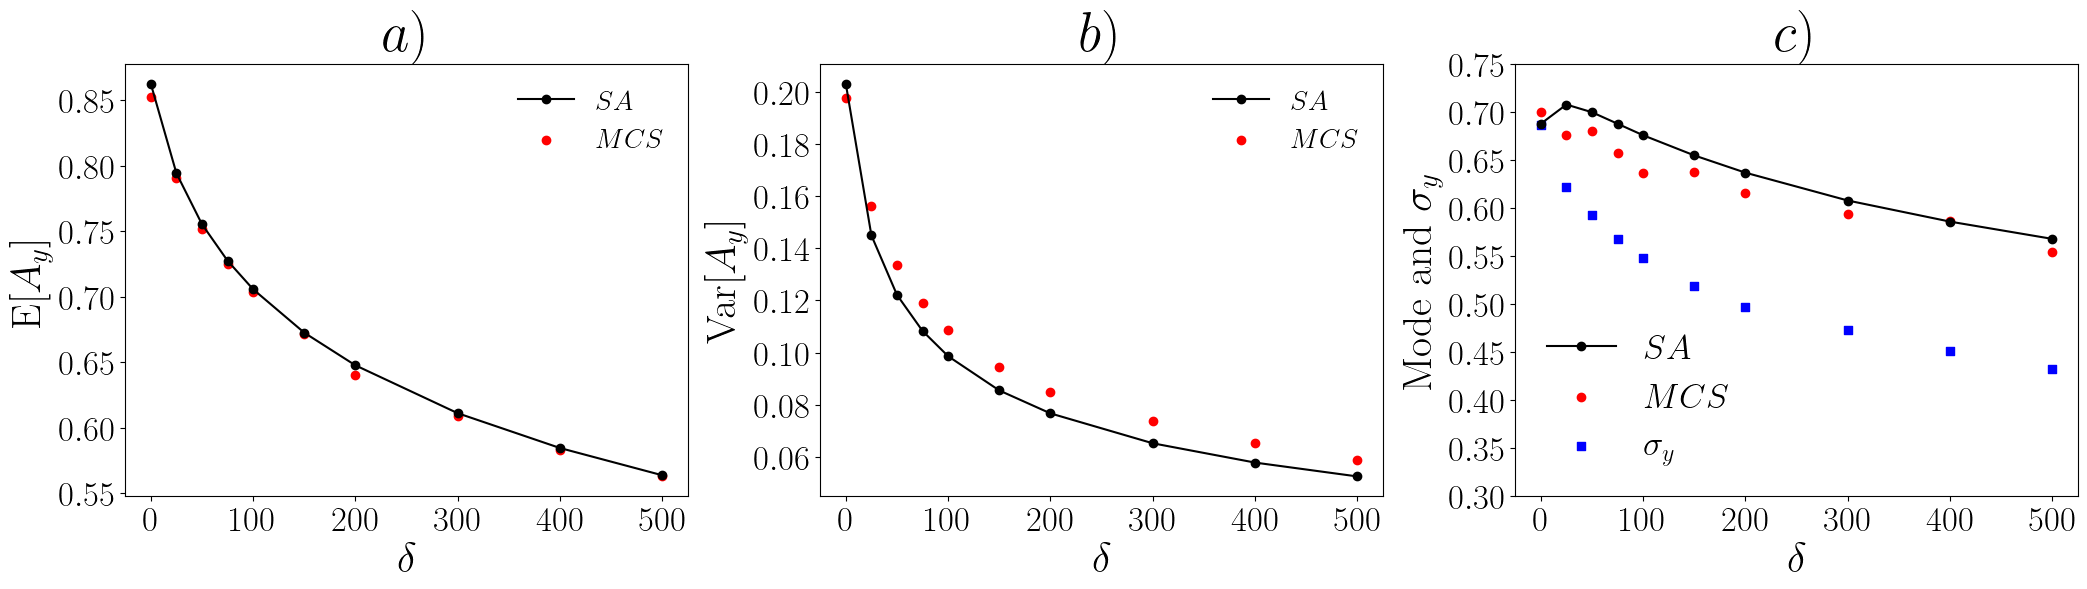

In [3]:
D1 = loadmat('mcs_mode.mat')
modes = D1["mode1"][0]
stdy = D1["stdy"][0]

idmax0=np.argmax(pAy)
idmax1=np.argmax(pAy01)
idmax2=np.argmax(pAy02)
idmax3=np.argmax(pAy03)
idmax4=np.argmax(pAy04)
idmax5=np.argmax(pAy05)
idmax6=np.argmax(pAy06)
idmax7=np.argmax(pAy07)

idmax8=np.argmax(pAy08)
idmax9=np.argmax(pAy09)

Amax=np.array([A[idmax0], A08[idmax8], A01[idmax1], A09[idmax9], A02[idmax2],A03[idmax3],A04[idmax4],A05[idmax5],A06[idmax6],A07[idmax7]])
dval=np.array([0, 25, 50, 75, 100, 150, 200, 300, 400, 500])

mean0=np.trapz(A*pAy,A);var0=np.trapz((A-mean0)**2*pAy,A)
mean1=np.trapz(A01*pAy01,A01);var1=np.trapz((A01-mean1)**2*pAy01,A01)
mean2=np.trapz(A02*pAy02,A02);var2=np.trapz((A02-mean2)**2*pAy02,A02)
mean3=np.trapz(A03*pAy03,A03);var3=np.trapz((A03-mean3)**2*pAy03,A03)
mean4=np.trapz(A04*pAy04,A04);var4=np.trapz((A04-mean4)**2*pAy04,A04)
mean5=np.trapz(A05*pAy05,A05);var5=np.trapz((A05-mean5)**2*pAy05,A05)
mean6=np.trapz(A06*pAy06,A06);var6=np.trapz((A06-mean6)**2*pAy06,A06)
mean7=np.trapz(A07*pAy07,A07);var7=np.trapz((A07-mean7)**2*pAy07,A07)

mean8=np.trapz(A08*pAy08,A08);var8=np.trapz((A08-mean8)**2*pAy08,A08)
mean9=np.trapz(A09*pAy09,A09);var9=np.trapz((A09-mean9)**2*pAy09,A09)

mval=np.array([mean0, mean8, mean1, mean9, mean2, mean3, mean4, mean5, mean6, mean7])
vval=np.array([var0, var8, var1, var9, var2, var3, var4, var5, var6, var7])

Ds = loadmat('stats.mat')
meanv = Ds["mval1"][0]
varv = Ds["vval1"][0]

fig = plt.figure(figsize=(21, 6))

ax = fig.add_subplot(1, 3, 1)
ax.plot(dval, mval,'ko-',label=r'$SA$')
ax.scatter(dval, meanv,c='r',label=r'$MCS$')
ax.legend(prop={'size':20}, framealpha=0.0)
ax.set_xticks(np.arange(0, 525, 100))
ax.set_yticks(np.arange(0.55, 0.875, 0.05))
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title(r'$a)$',fontsize=40)
ax.set_xlabel('$\delta$', fontsize=30)
ax.set_ylabel(r'$\mathrm{E}[A_y]$', fontsize=30)

ax = fig.add_subplot(1, 3, 2)
ax.plot(dval, vval,'ko-',label=r'$SA$')
ax.scatter(dval, varv,c='r',label=r'$MCS$')
ax.legend(prop={'size':20}, framealpha=0.0)
ax.set_xticks(np.arange(0, 525, 100))
ax.set_yticks(np.arange(0.06, 0.21, 0.02))
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title(r'$b)$',fontsize=40)
ax.set_xlabel(r'$\delta$', fontsize=30)
ax.set_ylabel(r'$\mathrm{Var}[A_y]$', fontsize=30)

ax = fig.add_subplot(1, 3, 3)
ax.plot(dval, Amax,'ko-',label=r'$SA$')
ax.scatter(dval, modes,c='r',label=r'$MCS$')
ax.scatter(dval, stdy,marker='s',c='b',label=r'$\sigma_y$')
ax.legend(prop={'size':25}, framealpha=0.0)
ax.set_ylim(0.3,.75)
ax.set_xticks(np.arange(0, 525, 100))
ax.set_yticks(np.arange(0.3, 0.76, 0.05))
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title(r'$c)$',fontsize=40)
ax.set_xlabel(r'$\delta$', fontsize=30)
ax.set_ylabel(r'Mode and $\sigma_y$', fontsize=30)


fig.tight_layout()
plt.draw()
plt.savefig('figure_3.eps',dpi=1000)
plt.show()

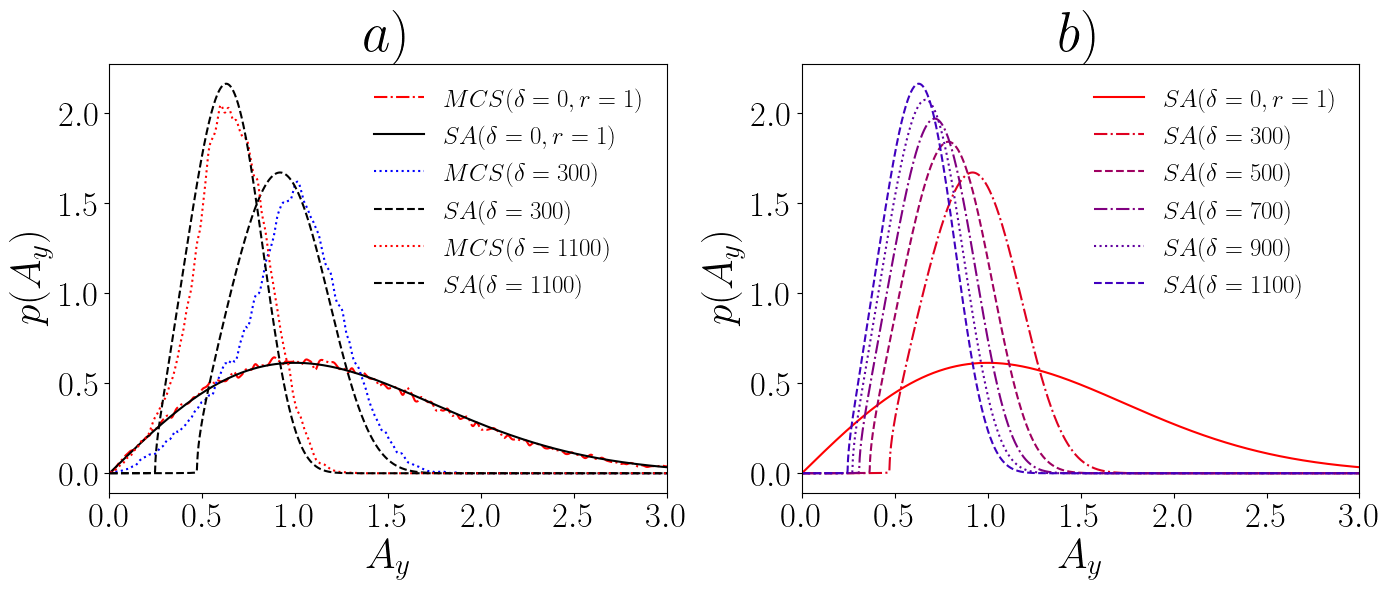

In [4]:
D1 = loadmat('mcs_stat_lin_proc_a001.mat')
A = D1["A"][0]
p = D1["p"][0]
pAy = D1["pAy"][0]

D01 = loadmat('mcs_stat_bi_proc_d300.mat')
A01 = D01["A"][0]
p01 = D01["p"][0]
pAy01 = D01["pAy"][0]

D02 = loadmat('mcs_stat_bi_proc_d500.mat')
A02 = D02["A"][0]
p02 = D02["p"][0]
pAy02 = D02["pAy"][0]

D03 = loadmat('mcs_stat_bi_proc_d700.mat')
A03 = D03["A"][0]
p03 = D03["p"][0]
pAy03 = D03["pAy"][0]

D04 = loadmat('mcs_stat_bi_proc_d900.mat')
A04 = D04["A"][0]
p04 = D04["p"][0]
pAy04 = D04["pAy"][0]

D05 = loadmat('mcs_stat_bi_proc_d1100.mat')
A05 = D05["A"][0]
p05 = D05["p"][0]
pAy05 = D05["pAy"][0]



fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1)

ax.plot(A,p,'r-.',label=r'$MCS (\delta=0, r=1)$')
ax.plot(A,pAy,'k-',label=r'$SA (\delta=0, r=1)$')
ax.plot(A01,p01,'b:',label=r'$MCS (\delta=300)$')
ax.plot(A01,pAy01,'k--',label=r'$SA (\delta=300)$')
ax.plot(A05,p05,'r:',label=r'$MCS (\delta=1100)$')
ax.plot(A05,pAy05,'k--',label=r'$SA (\delta=1100)$')
ax.legend(prop={'size':18}, framealpha=0.0)
ax.set_xlim(0,3)
ax.set_xticks(np.arange(0, 3.1, 0.5))
ax.set_yticks(np.arange(0, 2.1, 0.5))
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xlabel('$A_y$', fontsize=30)
ax.set_ylabel('$p(A_y)$', fontsize=30)
ax.set_title(r'$a)$',fontsize=40)

ax = fig.add_subplot(1, 2, 2)
ax.plot(A,pAy,'r-',label=r'$SA (\delta=0, r=1)$')
ax.plot(A01,pAy01,'-.',color=[0.875,0,0.125],label=r'$SA (\delta=300)$')
ax.plot(A02,pAy02,'--',color=[0.625,0,0.375],label=r'$SA (\delta=500)$')
ax.plot(A03,pAy03,'-.',color=[0.5,0,0.5],label=r'$SA (\delta=700)$')
ax.plot(A04,pAy04,':',color=[0.375,0,0.625],label=r'$SA (\delta=900)$')
ax.plot(A05,pAy05,'--',color=[0.25,0,0.75],label=r'$SA (\delta=1100)$')
ax.legend(prop={'size':18}, framealpha=0.0)
ax.set_xlim(0,3)
ax.set_xticks(np.arange(0, 3.1, 0.5))
ax.set_yticks(np.arange(0, 2.1, 0.5))
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title(r'$b)$',fontsize=40)
ax.set_xlabel('$A_y$', fontsize=30)
ax.set_ylabel('$p(A_y)$', fontsize=30)

fig.tight_layout()
plt.draw()
plt.savefig('figure_4.eps',dpi=1000)
plt.show()

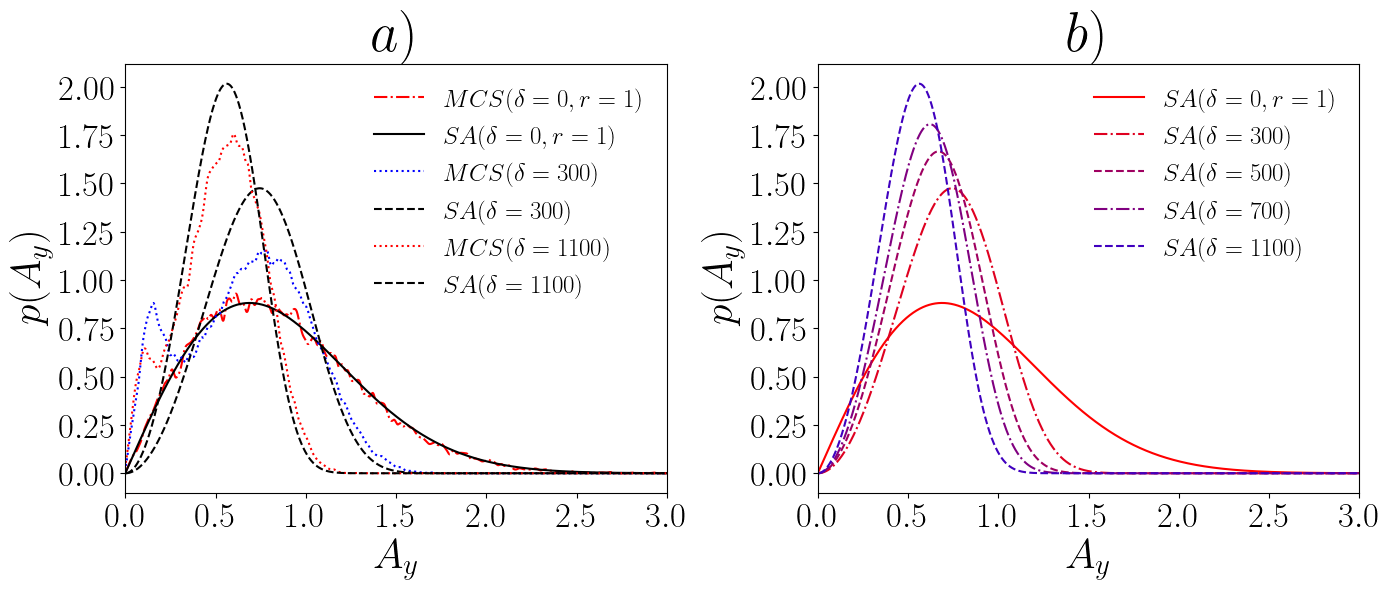

In [5]:
D1 = loadmat('mcs_stat_lin_proc.mat')
A = D1["A"][0]
p = D1["p"][0]
pAy = D1["pAy"][0]

D01 = loadmat('mcs_stat_bi_proc_a10_d300.mat')
A01 = D01["A"][0]
p01 = D01["p"][0]
pAy01 = D01["pAy"][0]

D02 = loadmat('mcs_stat_bi_proc_a10_d500.mat')
A02 = D02["A"][0]
p02 = D02["p"][0]
pAy02 = D02["pAy"][0]

D03 = loadmat('mcs_stat_bi_proc_a10_d700.mat')
A03 = D03["A"][0]
p03 = D03["p"][0]
pAy03 = D03["pAy"][0]

D04 = loadmat('mcs_stat_bi_proc_a10_d900.mat')
A04 = D04["A"][0]
p04 = D04["p"][0]
pAy04 = D04["pAy"][0]

D05 = loadmat('mcs_stat_bi_proc_a10_d1100.mat')
A05 = D05["A"][0]
p05 = D05["p"][0]
pAy05 = D05["pAy"][0]


fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1)

ax.plot(A,p,'r-.',label=r'$MCS (\delta=0, r=1)$')
ax.plot(A,pAy,'k-',label=r'$SA (\delta=0, r=1)$')
ax.plot(A01,p01,'b:',label=r'$MCS (\delta=300)$')
ax.plot(A01,pAy01,'k--',label=r'$SA (\delta=300)$')
ax.plot(A05,p05,'r:',label=r'$MCS (\delta=1100)$')
ax.plot(A05,pAy05,'k--',label=r'$SA (\delta=1100)$')

ax.legend(prop={'size':18}, framealpha=0.0)
ax.set_xlim(0,3)
ax.set_xticks(np.arange(0, 3.1, 0.5))
ax.set_yticks(np.arange(0, 2.1, 0.25))
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xlabel('$A_y$', fontsize=30)
ax.set_ylabel('$p(A_y)$', fontsize=30)
ax.set_title(r'$a)$',fontsize=40)

ax = fig.add_subplot(1, 2, 2)
ax.plot(A,pAy,'r-',label=r'$SA (\delta=0, r=1)$')
ax.plot(A01,pAy01,'-.',color=[0.875,0,0.125],label=r'$SA (\delta=300)$')
ax.plot(A02,pAy02,'--',color=[0.625,0,0.375],label=r'$SA (\delta=500)$')
ax.plot(A03,pAy03,'-.',color=[0.5,0,0.5],label=r'$SA (\delta=700)$')
ax.plot(A05,pAy05,'--',color=[0.25,0,0.75],label=r'$SA (\delta=1100)$')
ax.legend(prop={'size':18}, framealpha=0.0)
ax.set_xlim(0,3)
ax.set_xticks(np.arange(0, 3.1, 0.5))
ax.set_yticks(np.arange(0, 2.1, 0.25))
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title(r'$b)$',fontsize=40)
ax.set_xlabel('$A_y$', fontsize=30)
ax.set_ylabel('$p(A_y)$', fontsize=30)

fig.tight_layout()
plt.draw()
plt.savefig('figure_5.eps',dpi=1000)
plt.show()